<a href="https://colab.research.google.com/github/mayankmjk/DL_LAb/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


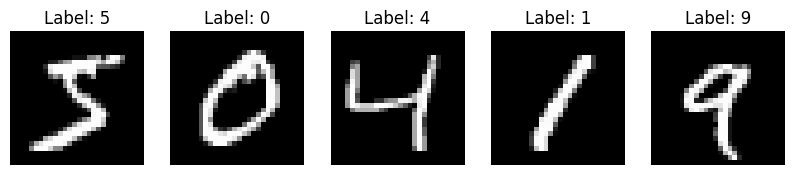

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Visualize the first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

# 3. Check the data shape
print(f"Training data shape: {x_train.shape}") # (60000, 28, 28)
print(f"Test data shape: {x_test.shape}")      # (10000, 28, 28)

In [5]:
# Flatten and Normalize
x_train = x_train.reshape(60000, 784).T / 255.0
x_test = x_test.reshape(10000, 784).T / 255.0

# One-hot encoding for labels
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

y_train_oh = one_hot(y_train)

In [6]:
def init_params():
    W1 = np.random.randn(256, 784) * 0.005
    b1 = np.zeros((256, 1))
    W2 = np.random.randn(10, 256) * 0.005
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp = np.exp(Z - np.max(Z)) # Subtract max for numerical stability
    return exp / np.sum(exp, axis=0)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.shape[1]
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * (Z1 > 0) # Derivative of ReLU
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [7]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 50 == 0:
            predictions = np.argmax(A2, axis=0)
            labels = np.argmax(Y, axis=0)
            accuracy = np.sum(predictions == labels) / labels.size
            print(f"Iteration {i}: Accuracy {accuracy:.4f}")

    return W1, b1, W2, b2

# Start training
W1, b1, W2, b2 = gradient_descent(x_train, y_train_oh, iterations=500, alpha=0.1)

Iteration 0: Accuracy 0.0906
Iteration 50: Accuracy 0.4506
Iteration 100: Accuracy 0.7626
Iteration 150: Accuracy 0.8340
Iteration 200: Accuracy 0.8641
Iteration 250: Accuracy 0.8792
Iteration 300: Accuracy 0.8879
Iteration 350: Accuracy 0.8940
Iteration 400: Accuracy 0.8980
Iteration 450: Accuracy 0.9015
